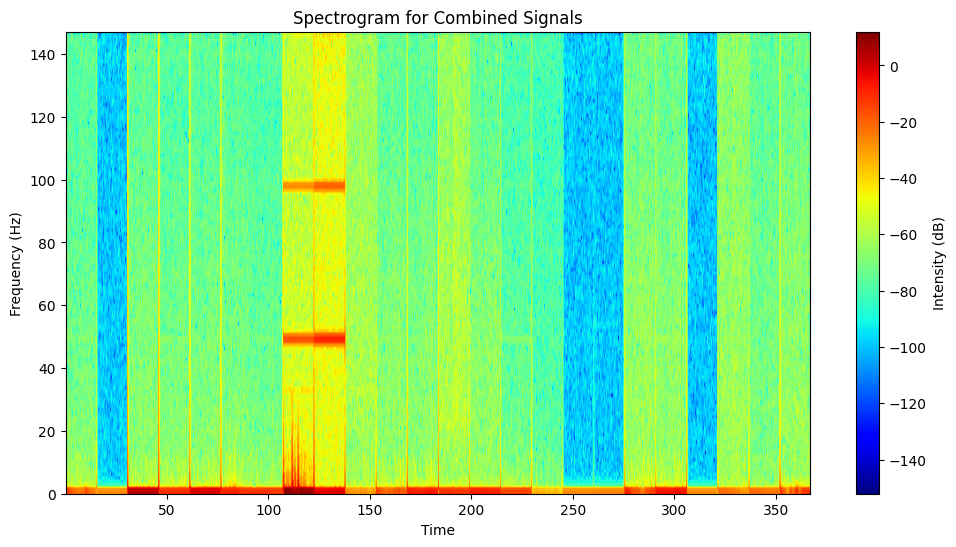

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the CSV file
df = pd.read_csv('train/user01_raw_01.csv')

# Extract time column
time = df['Time']

# Combine all signal columns into one column
merged_signal = pd.concat([df[col] for col in df.columns[1:]]).reset_index(drop=True)

# Perform standard scaling (optional)
scaler = StandardScaler()
merged_signal_scaled = scaler.fit_transform(merged_signal.values.reshape(-1, 1)).flatten()

# Set parameters for spectrogram
fs = 1 / (time.iloc[1] - time.iloc[0])  # Sampling frequency
nperseg = 256  # Number of data points per segment
noverlap = nperseg // 2  # Overlap between segments

# Plot spectrogram
plt.figure(figsize=(12, 6))
plt.specgram(merged_signal_scaled, Fs=fs, NFFT=nperseg, noverlap=noverlap, cmap='jet')
plt.colorbar(label='Intensity (dB)')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time')
plt.title('Spectrogram for Combined Signals')
plt.show()


# Scaling and Making Spectrograms for each train and validation csv files

In [48]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.preprocessing import StandardScaler

# Load the labels
labels_df = pd.read_csv('train_labels.csv')

# Create a folder to save spectrograms if it doesn't exist
spectrogram_folder = 'train_spectrograms'
if not os.path.exists(spectrogram_folder):
    os.makedirs(spectrogram_folder)

# Create an empty DataFrame to store spectrogram names and labels
spectrogram_labels_df = pd.DataFrame(columns=['spectrogram_name', 'class'])

# Function to generate spectrogram
def generate_spectrogram(file_path, label):
    # Load the CSV file
    df = pd.read_csv(file_path)

    # Extract time column
    time = df['Time']

    # Combine all signal columns into one column
    merged_signal = pd.concat([df[col] for col in df.columns[1:]]).reset_index(drop=True)

    # Perform standard scaling (optional)
    scaler = StandardScaler()
    merged_signal_scaled = scaler.fit_transform(merged_signal.values.reshape(-1, 1)).flatten()

    # Set parameters for spectrogram
    fs = 1 / (time.iloc[1] - time.iloc[0])  # Sampling frequency
    nperseg = 256  # Number of data points per segment
    noverlap = nperseg // 2  # Overlap between segments

    # Compute spectrogram
    f, t, Sxx = signal.spectrogram(merged_signal_scaled, fs=fs, nperseg=nperseg, noverlap=noverlap)

    # Plot spectrogram (optional)
    # plt.figure(figsize=(12, 6))
    # plt.pcolormesh(t, f, 10 * np.log10(Sxx), cmap='jet')
    # plt.colorbar(label='Intensity (dB)')
    # plt.ylabel('Frequency (Hz)')
    # plt.xlabel('Time')
    # plt.title('Spectrogram for Combined Signals')
    # plt.show()

    # Save spectrogram image
    spectrogram_name = os.path.splitext(os.path.basename(file_path))[0] + '_spec.png'
    spectrogram_path = os.path.join(spectrogram_folder, spectrogram_name)
    plt.imsave(spectrogram_path, 10 * np.log10(Sxx), cmap='jet')

    # Add spectrogram name and label to DataFrame
    spectrogram_labels_df.loc[len(spectrogram_labels_df)] = [spectrogram_name, label]

# Iterate through each file in the train folder
for file_name in os.listdir('train'):
    if file_name.endswith('.csv'):
        file_path = os.path.join('train', file_name)
        label = labels_df.loc[labels_df['filename'] == file_name, 'class'].values[0]
        generate_spectrogram(file_path, label)

# Save the DataFrame to CSV
spectrogram_labels_df.to_csv('train_spectrogram_labels.csv', index=False)


C:\Users\aarth\AppData\Local\Temp\ipykernel_42612\2751897795.py:54: RuntimeWarning: divide by zero encountered in log10
  plt.imsave(spectrogram_path, 10 * np.log10(Sxx), cmap='jet')
C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\matplotlib\colors.py:1354: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\matplotlib\colors.py:1355: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
C:\Users\aarth\AppData\Local\Temp\ipykernel_42612\2751897795.py:54: RuntimeWarning: divide by zero encountered in log10
  plt.imsave(spectrogram_path, 10 * np.log10(Sxx), cmap='jet')
C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\matplotlib\colors.py:1354: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\matplotlib\colors.py:1355: RuntimeWarning: invalid value encountered in divide
  resd

In [49]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.preprocessing import StandardScaler

# Load the labels
labels_df = pd.read_csv('validation_labels.csv')

# Create a folder to save spectrograms if it doesn't exist
spectrogram_folder = 'validation_spectrograms'
if not os.path.exists(spectrogram_folder):
    os.makedirs(spectrogram_folder)

# Create an empty DataFrame to store spectrogram names and labels
spectrogram_labels_df = pd.DataFrame(columns=['spectrogram_name', 'class'])

# Function to generate spectrogram
def generate_spectrogram(file_path, label):
    # Load the CSV file
    df = pd.read_csv(file_path)

    # Extract time column
    time = df['Time']

    # Combine all signal columns into one column
    merged_signal = pd.concat([df[col] for col in df.columns[1:]]).reset_index(drop=True)

    # Perform standard scaling (optional)
    scaler = StandardScaler()
    merged_signal_scaled = scaler.fit_transform(merged_signal.values.reshape(-1, 1)).flatten()

    # Set parameters for spectrogram
    fs = 1 / (time.iloc[1] - time.iloc[0])  # Sampling frequency
    nperseg = 256  # Number of data points per segment
    noverlap = nperseg // 2  # Overlap between segments

    # Compute spectrogram
    f, t, Sxx = signal.spectrogram(merged_signal_scaled, fs=fs, nperseg=nperseg, noverlap=noverlap)

    # Plot spectrogram (optional)
    # plt.figure(figsize=(12, 6))
    # plt.pcolormesh(t, f, 10 * np.log10(Sxx), cmap='jet')
    # plt.colorbar(label='Intensity (dB)')
    # plt.ylabel('Frequency (Hz)')
    # plt.xlabel('Time')
    # plt.title('Spectrogram for Combined Signals')
    # plt.show()

    # Save spectrogram image
    spectrogram_name = os.path.splitext(os.path.basename(file_path))[0] + '_spec.png'
    spectrogram_path = os.path.join(spectrogram_folder, spectrogram_name)
    plt.imsave(spectrogram_path, 10 * np.log10(Sxx), cmap='jet')

    # Add spectrogram name and label to DataFrame
    spectrogram_labels_df.loc[len(spectrogram_labels_df)] = [spectrogram_name, label]

# Iterate through each file in the train folder
for file_name in os.listdir('validation'):
    if file_name.endswith('.csv'):
        file_path = os.path.join('validation', file_name)
        label = labels_df.loc[labels_df['filename'] == file_name, 'class'].values[0]
        generate_spectrogram(file_path, label)

# Save the DataFrame to CSV
spectrogram_labels_df.to_csv('validation_spectrogram_labels.csv', index=False)

C:\Users\aarth\AppData\Local\Temp\ipykernel_42612\2583607950.py:54: RuntimeWarning: divide by zero encountered in log10
  plt.imsave(spectrogram_path, 10 * np.log10(Sxx), cmap='jet')
C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\matplotlib\colors.py:1354: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\matplotlib\colors.py:1355: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
C:\Users\aarth\AppData\Local\Temp\ipykernel_42612\2583607950.py:54: RuntimeWarning: divide by zero encountered in log10
  plt.imsave(spectrogram_path, 10 * np.log10(Sxx), cmap='jet')
C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\matplotlib\colors.py:1354: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\matplotlib\colors.py:1355: RuntimeWarning: invalid value encountered in divide
  resd

# Making a CNN with fixed Input Image size

Found 360 validated image filenames belonging to 6 classes.
Found 180 validated image filenames belonging to 6 classes.


Epoch 1/100
11/11 [==============================] - 4s 235ms/step - loss: 1.8853 - accuracy: 0.1585 - val_loss: 1.7946 - val_accuracy: 0.1375
Epoch 2/100
11/11 [==============================] - 2s 210ms/step - loss: 1.7939 - accuracy: 0.1951 - val_loss: 1.7916 - val_accuracy: 0.1688
Epoch 3/100
11/11 [==============================] - 2s 213ms/step - loss: 1.7925 - accuracy: 0.1616 - val_loss: 1.7914 - val_accuracy: 0.1937
Epoch 4/100
11/11 [==============================] - 2s 215ms/step - loss: 1.7888 - accuracy: 0.1890 - val_loss: 1.7914 - val_accuracy: 0.1688
Epoch 5/100
11/11 [==============================] - 2s 210ms/step - loss: 1.7847 - accuracy: 0.1982 - val_loss: 1.7912 - val_accuracy: 0.1625
Epoch 6/100
11/11 [==============================] - 2s 220ms/step - loss: 1.7845 - accuracy: 0.1707 - val_loss: 1.7867 - val_accuracy: 0.1688
Epoch 7/100
11/11 [==============================] - 3s 229ms/step - loss: 1.7853 - accuracy: 0.1932 - val_loss: 1.7971 - val_accuracy: 0.1750

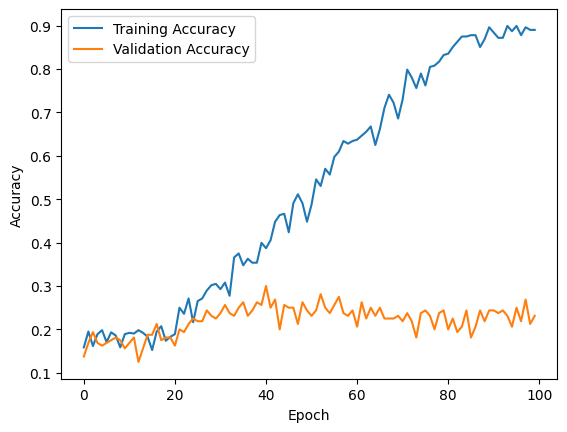

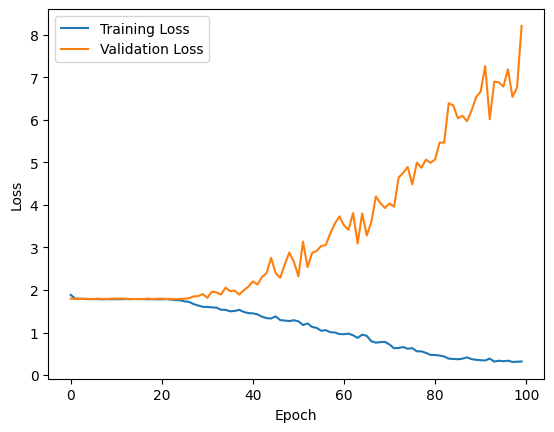

In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define constants
IMAGE_SIZE = (100, 100)  # Define your image size
BATCH_SIZE = 32
EPOCHS = 100

# Load data
train_df = pd.read_csv('train_spectrogram_labels.csv')
validation_df = pd.read_csv('validation_spectrogram_labels.csv')

# ImageDataGenerator for data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow data from directories
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='train_spectrograms',
    x_col='spectrogram_name',
    y_col='class',  # Change 'label' to 'class'
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_dataframe(
    dataframe=validation_df,
    directory='validation_spectrograms',
    x_col='spectrogram_name',
    y_col='class',  # Change 'label' to 'class'
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical')
NUM_CLASSES=6
# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')  # Ensure NUM_CLASSES matches your dataset
])

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



# Making a CNN with Input size determined by finding the spectrogram size

Found 360 validated image filenames belonging to 6 classes.
Found 180 validated image filenames belonging to 6 classes.
Epoch 1/100
11/11 [==============================] - 20s 2s/step - loss: 2.9548 - accuracy: 0.1585 - val_loss: 1.7975 - val_accuracy: 0.1688
Epoch 2/100
11/11 [==============================] - 20s 2s/step - loss: 1.7906 - accuracy: 0.1768 - val_loss: 1.7893 - val_accuracy: 0.1750
Epoch 3/100
11/11 [==============================] - 20s 2s/step - loss: 1.7900 - accuracy: 0.1799 - val_loss: 1.7923 - val_accuracy: 0.1750
Epoch 4/100
11/11 [==============================] - 21s 2s/step - loss: 1.7873 - accuracy: 0.1829 - val_loss: 1.7929 - val_accuracy: 0.1750
Epoch 5/100
11/11 [==============================] - 21s 2s/step - loss: 1.7860 - accuracy: 0.1860 - val_loss: 1.7963 - val_accuracy: 0.1688
Epoch 6/100
11/11 [==============================] - 21s 2s/step - loss: 1.7827 - accuracy: 0.1860 - val_loss: 1.7980 - val_accuracy: 0.1562
Epoch 7/100
11/11 [===============

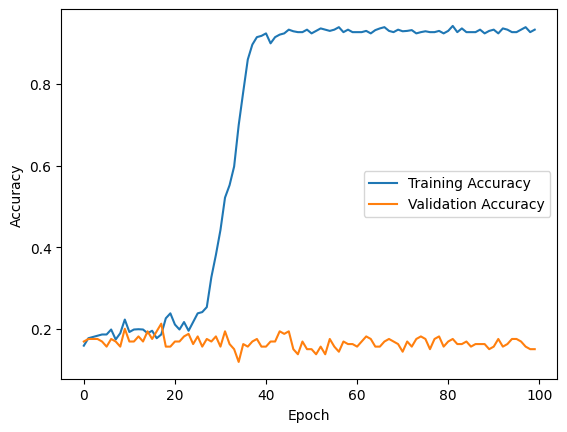

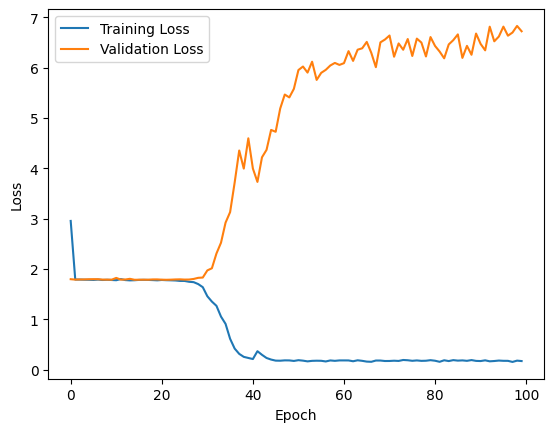

In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Function to find the size of the images
def find_image_size(sample_image_path):
    sample_image = Image.open(sample_image_path)
    return sample_image.size

# Path to a sample image
sample_image_path = 'train_spectrograms/user01_raw_01_spec.png'  # Change this to the path of a sample image

# Get the size of the images
image_size = find_image_size(sample_image_path)
image_width, image_height = image_size

# Constants
BATCH_SIZE = 32
EPOCHS = 100
NUM_CLASSES = 6  # Adjust this based on the number of classes in your dataset

# Load data
train_df = pd.read_csv('train_spectrogram_labels.csv')
validation_df = pd.read_csv('validation_spectrogram_labels.csv')

# ImageDataGenerator for data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow data from directories
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='train_spectrograms',
    x_col='spectrogram_name',
    y_col='class',
    target_size=image_size,  # Use the image size obtained
    batch_size=BATCH_SIZE,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_dataframe(
    dataframe=validation_df,
    directory='validation_spectrograms',
    x_col='spectrogram_name',
    y_col='class',
    target_size=image_size,  # Use the image size obtained
    batch_size=BATCH_SIZE,
    class_mode='categorical')

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_width, image_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Creating Spectrgrams without scaling for train and validation

In [50]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Load the labels
labels_df = pd.read_csv('train_labels.csv')

# Create a folder to save spectrograms if it doesn't exist
spectrogram_folder = 'train_spectrograms'
if not os.path.exists(spectrogram_folder):
    os.makedirs(spectrogram_folder)

# Create an empty DataFrame to store spectrogram names and labels
spectrogram_labels_df = pd.DataFrame(columns=['spectrogram_name', 'class'])

# Function to generate spectrogram
def generate_spectrogram(file_path, label):
    # Load the CSV file
    df = pd.read_csv(file_path)

    # Extract time column
    time = df['Time']

    # Combine all signal columns into one column
    merged_signal = pd.concat([df[col] for col in df.columns[1:]]).reset_index(drop=True)

    # Set parameters for spectrogram
    fs = 1 / (time.iloc[1] - time.iloc[0])  # Sampling frequency
    nperseg = 256  # Number of data points per segment
    noverlap = nperseg // 2  # Overlap between segments

    # Compute spectrogram
    f, t, Sxx = signal.spectrogram(merged_signal, fs=fs, nperseg=nperseg, noverlap=noverlap)

    # Plot spectrogram (optional)
    # plt.figure(figsize=(12, 6))
    # plt.pcolormesh(t, f, 10 * np.log10(Sxx), cmap='jet')
    # plt.colorbar(label='Intensity (dB)')
    # plt.ylabel('Frequency (Hz)')
    # plt.xlabel('Time')
    # plt.title('Spectrogram for Combined Signals')
    # plt.show()

    # Save spectrogram image
    spectrogram_name = os.path.splitext(os.path.basename(file_path))[0] + '_spec.png'
    spectrogram_path = os.path.join(spectrogram_folder, spectrogram_name)
    plt.imsave(spectrogram_path, 10 * np.log10(Sxx), cmap='jet')

    # Add spectrogram name and label to DataFrame
    spectrogram_labels_df.loc[len(spectrogram_labels_df)] = [spectrogram_name, label]

# Iterate through each file in the train folder
for file_name in os.listdir('train'):
    if file_name.endswith('.csv'):
        file_path = os.path.join('train', file_name)
        label = labels_df.loc[labels_df['filename'] == file_name, 'class'].values[0]
        generate_spectrogram(file_path, label)

# Save the DataFrame to CSV
spectrogram_labels_df.to_csv('train_spectrogram_labels.csv', index=False)


C:\Users\aarth\AppData\Local\Temp\ipykernel_42612\2252377142.py:49: RuntimeWarning: divide by zero encountered in log10
  plt.imsave(spectrogram_path, 10 * np.log10(Sxx), cmap='jet')
C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\matplotlib\colors.py:1354: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\matplotlib\colors.py:1355: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
C:\Users\aarth\AppData\Local\Temp\ipykernel_42612\2252377142.py:49: RuntimeWarning: divide by zero encountered in log10
  plt.imsave(spectrogram_path, 10 * np.log10(Sxx), cmap='jet')
C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\matplotlib\colors.py:1354: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\matplotlib\colors.py:1355: RuntimeWarning: invalid value encountered in divide
  resd

In [51]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Load the labels
labels_df = pd.read_csv('validation_labels.csv')

# Create a folder to save spectrograms if it doesn't exist
spectrogram_folder = 'validation_spectrograms'
if not os.path.exists(spectrogram_folder):
    os.makedirs(spectrogram_folder)

# Create an empty DataFrame to store spectrogram names and labels
spectrogram_labels_df = pd.DataFrame(columns=['spectrogram_name', 'class'])

# Function to generate spectrogram
def generate_spectrogram(file_path, label):
    # Load the CSV file
    df = pd.read_csv(file_path)

    # Extract time column
    time = df['Time']

    # Combine all signal columns into one column
    merged_signal = pd.concat([df[col] for col in df.columns[1:]]).reset_index(drop=True)

    # Set parameters for spectrogram
    fs = 1 / (time.iloc[1] - time.iloc[0])  # Sampling frequency
    nperseg = 256  # Number of data points per segment
    noverlap = nperseg // 2  # Overlap between segments

    # Compute spectrogram
    f, t, Sxx = signal.spectrogram(merged_signal, fs=fs, nperseg=nperseg, noverlap=noverlap)

    # Plot spectrogram (optional)
    # plt.figure(figsize=(12, 6))
    # plt.pcolormesh(t, f, 10 * np.log10(Sxx), cmap='jet')
    # plt.colorbar(label='Intensity (dB)')
    # plt.ylabel('Frequency (Hz)')
    # plt.xlabel('Time')
    # plt.title('Spectrogram for Combined Signals')
    # plt.show()

    # Save spectrogram image
    spectrogram_name = os.path.splitext(os.path.basename(file_path))[0] + '_spec.png'
    spectrogram_path = os.path.join(spectrogram_folder, spectrogram_name)
    plt.imsave(spectrogram_path, 10 * np.log10(Sxx), cmap='jet')

    # Add spectrogram name and label to DataFrame
    spectrogram_labels_df.loc[len(spectrogram_labels_df)] = [spectrogram_name, label]

# Iterate through each file in the train folder
for file_name in os.listdir('validation'):
    if file_name.endswith('.csv'):
        file_path = os.path.join('validation', file_name)
        label = labels_df.loc[labels_df['filename'] == file_name, 'class'].values[0]
        generate_spectrogram(file_path, label)

# Save the DataFrame to CSV
spectrogram_labels_df.to_csv('validation_spectrogram_labels.csv', index=False)

C:\Users\aarth\AppData\Local\Temp\ipykernel_42612\2298438518.py:49: RuntimeWarning: divide by zero encountered in log10
  plt.imsave(spectrogram_path, 10 * np.log10(Sxx), cmap='jet')
C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\matplotlib\colors.py:1354: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\matplotlib\colors.py:1355: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
C:\Users\aarth\AppData\Local\Temp\ipykernel_42612\2298438518.py:49: RuntimeWarning: divide by zero encountered in log10
  plt.imsave(spectrogram_path, 10 * np.log10(Sxx), cmap='jet')
C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\matplotlib\colors.py:1354: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\matplotlib\colors.py:1355: RuntimeWarning: invalid value encountered in divide
  resd

# Same  first CNN model

Found 360 validated image filenames belonging to 6 classes.
Found 180 validated image filenames belonging to 6 classes.


Epoch 1/100
11/11 [==============================] - 6s 472ms/step - loss: 1.8442 - accuracy: 0.1738 - val_loss: 1.7941 - val_accuracy: 0.1750
Epoch 2/100
11/11 [==============================] - 2s 239ms/step - loss: 1.7984 - accuracy: 0.1707 - val_loss: 1.7935 - val_accuracy: 0.1625
Epoch 3/100
11/11 [==============================] - 2s 211ms/step - loss: 1.7917 - accuracy: 0.1707 - val_loss: 1.7918 - val_accuracy: 0.1875
Epoch 4/100
11/11 [==============================] - 2s 216ms/step - loss: 1.7940 - accuracy: 0.1646 - val_loss: 1.7924 - val_accuracy: 0.1688
Epoch 5/100
11/11 [==============================] - 2s 220ms/step - loss: 1.7906 - accuracy: 0.1890 - val_loss: 1.7910 - val_accuracy: 0.1813
Epoch 6/100
11/11 [==============================] - 2s 211ms/step - loss: 1.7902 - accuracy: 0.1829 - val_loss: 1.7902 - val_accuracy: 0.1813
Epoch 7/100
11/11 [==============================] - 2s 217ms/step - loss: 1.7864 - accuracy: 0.1860 - val_loss: 1.7923 - val_accuracy: 0.1750

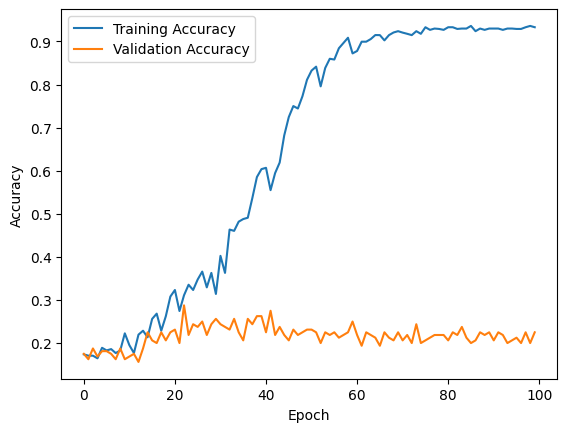

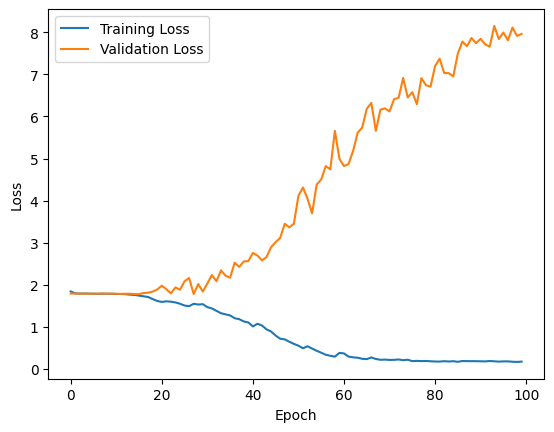

In [52]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define constants
IMAGE_SIZE = (100, 100)  # Define your image size
BATCH_SIZE = 32
EPOCHS = 100

# Load data
train_df = pd.read_csv('train_spectrogram_labels.csv')
validation_df = pd.read_csv('validation_spectrogram_labels.csv')

# ImageDataGenerator for data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow data from directories
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='train_spectrograms',
    x_col='spectrogram_name',
    y_col='class',  # Change 'label' to 'class'
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_dataframe(
    dataframe=validation_df,
    directory='validation_spectrograms',
    x_col='spectrogram_name',
    y_col='class',  # Change 'label' to 'class'
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical')
NUM_CLASSES=6
# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')  # Ensure NUM_CLASSES matches your dataset
])

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [111]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define constants
IMAGE_SIZE = (100, 100)  # Define your image size
BATCH_SIZE = 32
EPOCHS = 100

# Load data
train_df = pd.read_csv('train_spectrogram_labels.csv')
validation_df = pd.read_csv('validation_spectrogram_labels.csv')

# ImageDataGenerator for data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow data from directories
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='train_spectrograms',
    x_col='spectrogram_name',
    y_col='class',  # Change 'label' to 'class'
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_dataframe(
    dataframe=validation_df,
    directory='validation_spectrograms',
    x_col='spectrogram_name',
    y_col='class',  # Change 'label' to 'class'
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical')

NUM_CLASSES = 6

# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')  # Ensure NUM_CLASSES matches your dataset
])

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
epochs = 100
historyy = {'loss': [], 'accuracy': [], 'val_loss': [], 'val_accuracy': []}  # Initialize history dictionary
for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}:")
    print("Training...")
    history = model.fit(train_generator, validation_data=validation_generator, batch_size=32, verbose=1)
    print("Training Loss:", history.history['loss'][-1])
    print("Training Accuracy:", history.history['accuracy'][-1])
    print("Validation Loss:", history.history['val_loss'][-1])
    print("Validation Accuracy:", history.history['val_accuracy'][-1])
    print("")
    # Append history values for this epoch
    historyy['loss'].append(history.history['loss'][-1])
    historyy['accuracy'].append(history.history['accuracy'][-1])
    historyy['val_loss'].append(history.history['val_loss'][-1])
    historyy['val_accuracy'].append(history.history['val_accuracy'][-1])
    if historyy['val_accuracy'][-1]>0.3:
        break
# Evaluate model
loss, accuracy = model.evaluate(validation_generator)
print("\nEvaluation Results:")
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)



Found 360 validated image filenames belonging to 6 classes.
Found 180 validated image filenames belonging to 6 classes.
Epoch 1/100:
Training...
12/12 [==============================] - 4s 221ms/step - loss: 1.8700 - accuracy: 0.1583 - val_loss: 1.8007 - val_accuracy: 0.1667
Training Loss: 1.8700075149536133
Training Accuracy: 0.15833333134651184
Validation Loss: 1.8007375001907349
Validation Accuracy: 0.1666666716337204

Epoch 2/100:
Training...
12/12 [==============================] - 3s 245ms/step - loss: 1.7954 - accuracy: 0.1861 - val_loss: 1.7918 - val_accuracy: 0.1778
Training Loss: 1.7954193353652954
Training Accuracy: 0.18611110746860504
Validation Loss: 1.7918119430541992
Validation Accuracy: 0.17777778208255768

Epoch 3/100:
Training...
12/12 [==============================] - 3s 247ms/step - loss: 1.7915 - accuracy: 0.1833 - val_loss: 1.7908 - val_accuracy: 0.1833
Training Loss: 1.7915172576904297
Training Accuracy: 0.18333333730697632
Validation Loss: 1.7908318042755127
Va

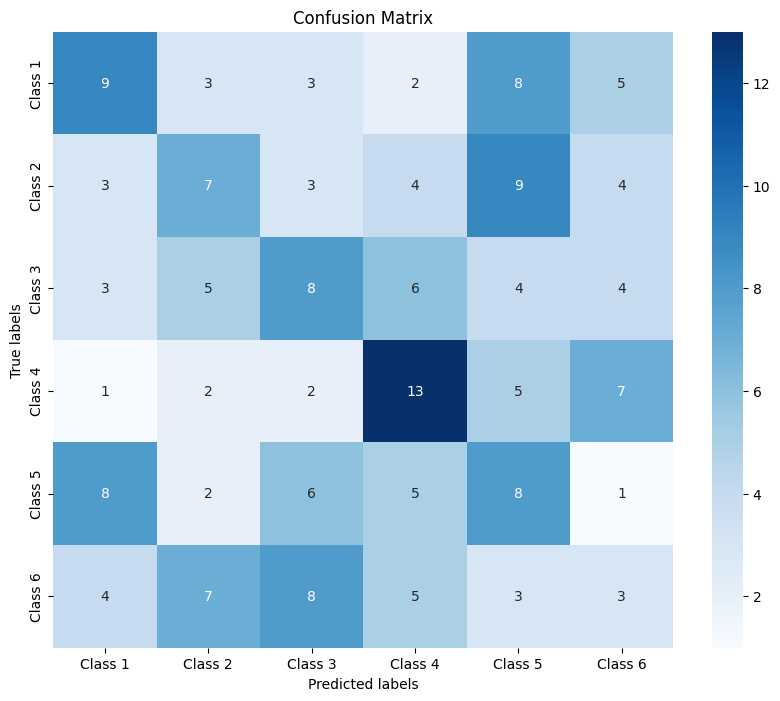

Class-wise accuracy:
Class 1: 0.3000000
Class 2: 0.2333333
Class 3: 0.2666667
Class 4: 0.4333333
Class 5: 0.2666667
Class 6: 0.1000000
Overall Accuracy: 0.26666666666666666


In [216]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the confusion matrix values
confusion_matrix_values = [
    [9, 3, 3, 2, 8, 5],
    [3, 7, 3, 4, 9, 4],
    [3, 5, 8, 6, 4, 4],
    [1, 2, 2, 13, 5, 7],
    [8, 2, 6, 5, 8, 1],
    [4, 7, 8, 5, 3, 3]
]

# Convert the list to a numpy array to create the confusion matrix
conf_matrix = np.array(confusion_matrix_values)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6'], 
            yticklabels=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate overall accuracy
total_samples = np.sum(conf_matrix)
correct_predictions = np.sum(np.diag(conf_matrix))
overall_accuracy = correct_predictions / total_samples

# Calculate class-wise accuracy
class_wise_accuracy = {}
for i in range(conf_matrix.shape[0]):
    class_wise_accuracy[f"Class {i+1}"] = conf_matrix[i,i] / np.sum(conf_matrix[i,:])

# Print class-wise accuracy
print("Class-wise accuracy:")
for class_label, accuracy in class_wise_accuracy.items():
    print(f"{class_label}: {accuracy:.7f}")

# Print overall accuracy
print("Overall Accuracy:", overall_accuracy)



Found 360 validated image filenames belonging to 6 classes.


Found 180 validated image filenames belonging to 6 classes.
Epoch 1/50
11/11 [==============================] - 3s 243ms/step - loss: 1.8957 - accuracy: 0.1646 - val_loss: 1.7899 - val_accuracy: 0.1937
Epoch 2/50
11/11 [==============================] - 2s 210ms/step - loss: 1.8014 - accuracy: 0.1707 - val_loss: 1.7915 - val_accuracy: 0.1688
Epoch 3/50
11/11 [==============================] - 2s 210ms/step - loss: 1.7903 - accuracy: 0.1616 - val_loss: 1.7899 - val_accuracy: 0.1625
Epoch 4/50
11/11 [==============================] - 2s 208ms/step - loss: 1.7842 - accuracy: 0.2073 - val_loss: 1.7856 - val_accuracy: 0.2000
Epoch 5/50
11/11 [==============================] - 2s 210ms/step - loss: 1.7822 - accuracy: 0.2195 - val_loss: 1.7919 - val_accuracy: 0.1688
Epoch 6/50
11/11 [==============================] - 2s 208ms/step - loss: 1.7839 - accuracy: 0.1890 - val_loss: 1.7865 - val_accuracy: 0.1750
Epoch 7/50
11/11 [==============================] - 2s 220ms/step - loss: 1.7824 - accur

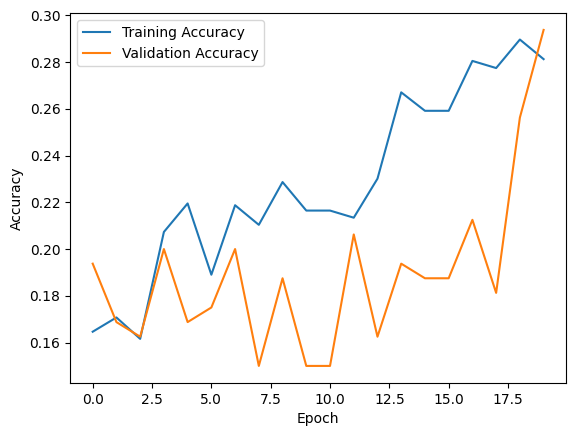

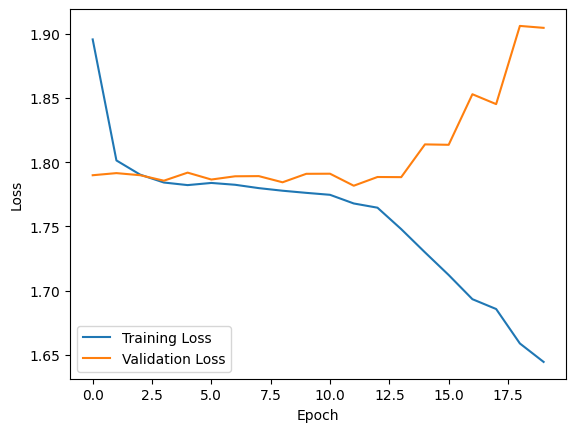

In [46]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define constants
IMAGE_SIZE = (100, 100)  # Define your image size
BATCH_SIZE = 32
EPOCHS = 100

# Load data
train_df = pd.read_csv('train_spectrogram_labels.csv')
validation_df = pd.read_csv('validation_spectrogram_labels.csv')

# ImageDataGenerator for data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow data from directories
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='train_spectrograms',
    x_col='spectrogram_name',
    y_col='class',  # Change 'label' to 'class'
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_dataframe(
    dataframe=validation_df,
    directory='validation_spectrograms',
    x_col='spectrogram_name',
    y_col='class',  # Change 'label' to 'class'
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical')
NUM_CLASSES=6
# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')  # Ensure NUM_CLASSES matches your dataset
])

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

from tensorflow.keras.callbacks import Callback

class CustomEarlyStopping(Callback):
    def __init__(self, monitor='val_accuracy', target_accuracy=0.28, verbose=1):
        super(CustomEarlyStopping, self).__init__()
        self.monitor = monitor
        self.target_accuracy = target_accuracy
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs=None):
        current_accuracy = logs.get(self.monitor)
        if current_accuracy is None:
            raise ValueError(f"Validation accuracy for monitor '{self.monitor}' is not available. "
                             "Make sure the monitor matches the desired metric.")
        if current_accuracy >= self.target_accuracy:
            if self.verbose > 0:
                print(f"\nReached target accuracy ({self.target_accuracy*100:.2f}%). Stopping training.")
            self.model.stop_training = True

# Define the target accuracy
target_accuracy = 0.27  # Change this value to your desired validation accuracy threshold

# Define the CustomEarlyStopping callback with the target accuracy
custom_early_stopping = CustomEarlyStopping(target_accuracy=target_accuracy)

# Train the model with the custom early stopping callback
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    callbacks=[custom_early_stopping])

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

6/6 [==============================] - 1s 92ms/step


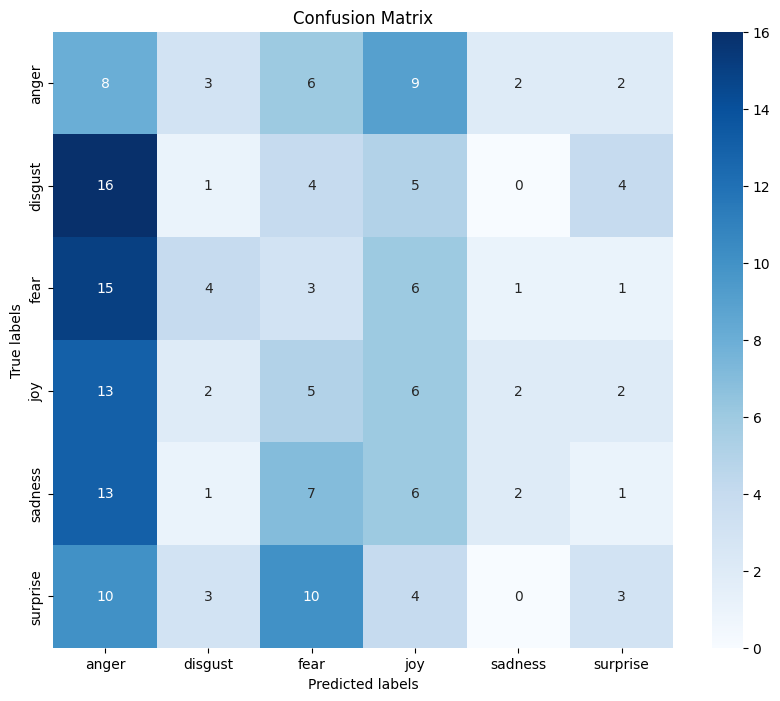

Class-wise accuracy:
Class 0: 0.26666666666666666
Class 1: 0.03333333333333333
Class 2: 0.1
Class 3: 0.2
Class 4: 0.06666666666666667
Class 5: 0.1
Overall Accuracy: 0.12777777777777777


In [47]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get predictions for the validation data
validation_generator.reset()
Y_pred = model.predict(validation_generator, validation_generator.samples // BATCH_SIZE + 1)
y_pred = np.argmax(Y_pred, axis=1)
y_true = validation_generator.classes

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Calculate class-wise accuracy
class_wise_accuracy = {}
for i in range(len(conf_matrix)):
    class_wise_accuracy[i] = conf_matrix[i][i] / sum(conf_matrix[i])

# Calculate overall accuracy
overall_accuracy = np.trace(conf_matrix) / np.sum(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=validation_generator.class_indices.keys(), 
            yticklabels=validation_generator.class_indices.keys())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Print class-wise accuracy
print("Class-wise accuracy:")
for class_label, accuracy in class_wise_accuracy.items():
    print(f"Class {class_label}: {accuracy}")

# Print overall accuracy
print("Overall Accuracy:", overall_accuracy)


# 24 image input spectrogram dataset

In [19]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Load the labels
labels_df = pd.read_csv('train_labels.csv')

# Create a folder to save spectrograms if it doesn't exist
spectrogram_folder = 'train_specs'
if not os.path.exists(spectrogram_folder):
    os.makedirs(spectrogram_folder)

# Function to generate spectrogram for each column
def generate_spectrograms(df, label, filename):
    # Extract time column
    time = df['Time']
    
    # Iterate through each signal column
    for col in df.columns[1:]:
        signal_data = df[col]
        
        # Set parameters for spectrogram
        fs = 1 / (time.iloc[1] - time.iloc[0])  # Sampling frequency
        nperseg = 256  # Number of data points per segment
        noverlap = nperseg // 2  # Overlap between segments

        # Compute spectrogram
        f, t, Sxx = signal.spectrogram(signal_data, fs=fs, nperseg=nperseg, noverlap=noverlap)

        # Save spectrogram image
        spectrogram_name = filename + '_' + col + '_spec.png'
        spectrogram_path = os.path.join(spectrogram_folder, filename, spectrogram_name)
        
        # Create folder for the CSV file if it doesn't exist
        if not os.path.exists(os.path.join(spectrogram_folder, filename)):
            os.makedirs(os.path.join(spectrogram_folder, filename))
        
        plt.imsave(spectrogram_path, 10 * np.log10(Sxx), cmap='jet')

# Iterate through each file in the train folder
for file_name in os.listdir('train'):
    if file_name.endswith('.csv'):
        file_path = os.path.join('train', file_name)
        label = labels_df.loc[labels_df['filename'] == file_name, 'class'].values[0]
        df = pd.read_csv(file_path)
        filename = os.path.splitext(file_name)[0]  # Get filename without extension
        generate_spectrograms(df, label, filename)


C:\Users\aarth\AppData\Local\Temp\ipykernel_33548\3545968432.py:40: RuntimeWarning: divide by zero encountered in log10
  plt.imsave(spectrogram_path, 10 * np.log10(Sxx), cmap='jet')
C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\matplotlib\colors.py:1354: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\matplotlib\colors.py:1355: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
C:\Users\aarth\AppData\Local\Temp\ipykernel_33548\3545968432.py:40: RuntimeWarning: divide by zero encountered in log10
  plt.imsave(spectrogram_path, 10 * np.log10(Sxx), cmap='jet')
C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\matplotlib\colors.py:1354: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\matplotlib\colors.py:1355: RuntimeWarning: invalid value encountered in divide
  resd

In [20]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Load the labels
labels_df = pd.read_csv('validation_labels.csv')

# Create a folder to save spectrograms if it doesn't exist
spectrogram_folder = 'validation_specs'
if not os.path.exists(spectrogram_folder):
    os.makedirs(spectrogram_folder)

# Function to generate spectrogram for each column
def generate_spectrograms(df, label, filename):
    # Extract time column
    time = df['Time']
    
    # Iterate through each signal column
    for col in df.columns[1:]:
        signal_data = df[col]
        
        # Set parameters for spectrogram
        fs = 1 / (time.iloc[1] - time.iloc[0])  # Sampling frequency
        nperseg = 256  # Number of data points per segment
        noverlap = nperseg // 2  # Overlap between segments

        # Compute spectrogram
        f, t, Sxx = signal.spectrogram(signal_data, fs=fs, nperseg=nperseg, noverlap=noverlap)

        # Save spectrogram image
        spectrogram_name = filename + '_' + col + '_spec.png'
        spectrogram_path = os.path.join(spectrogram_folder, filename, spectrogram_name)
        
        # Create folder for the CSV file if it doesn't exist
        if not os.path.exists(os.path.join(spectrogram_folder, filename)):
            os.makedirs(os.path.join(spectrogram_folder, filename))
        
        plt.imsave(spectrogram_path, 10 * np.log10(Sxx), cmap='jet')

# Iterate through each file in the train folder
for file_name in os.listdir('validation'):
    if file_name.endswith('.csv'):
        file_path = os.path.join('validation', file_name)
        label = labels_df.loc[labels_df['filename'] == file_name, 'class'].values[0]
        df = pd.read_csv(file_path)
        filename = os.path.splitext(file_name)[0]  # Get filename without extension
        generate_spectrograms(df, label, filename)

C:\Users\aarth\AppData\Local\Temp\ipykernel_33548\1777048107.py:40: RuntimeWarning: divide by zero encountered in log10
  plt.imsave(spectrogram_path, 10 * np.log10(Sxx), cmap='jet')
C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\matplotlib\colors.py:1354: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\matplotlib\colors.py:1355: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
C:\Users\aarth\AppData\Local\Temp\ipykernel_33548\1777048107.py:40: RuntimeWarning: divide by zero encountered in log10
  plt.imsave(spectrogram_path, 10 * np.log10(Sxx), cmap='jet')
C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\matplotlib\colors.py:1354: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
C:\Users\aarth\AppData\Roaming\Python\Python311\site-packages\matplotlib\colors.py:1355: RuntimeWarning: invalid value encountered in divide
  resd

In [24]:
from PIL import Image

# Path to your PNG image file
image_path = "train_specs/user01_raw_01/user01_raw_01_A1_spec.png"

# Open the image file
with Image.open(image_path) as img:
    # Get the dimensions of the image
    width, height = img.size

# Print the dimensions
print("Image dimensions (width x height):", width, "x", height)




Image dimensions (width x height): 34 x 129


In [1]:
import pandas as pd

# Load the train_labels CSV file
train_labels_df = pd.read_csv('train_labels.csv')

# Remove the '.csv' extension from the 'filename' column
train_labels_df['filename'] = train_labels_df['filename'].apply(lambda x: x[:-4] if x.endswith('.csv') else x)

# Save the modified DataFrame to a new CSV file
train_labels_df.to_csv('train_folder_labels.csv', index=False)

In [2]:
import pandas as pd

# Load the train_labels CSV file
train_labels_df = pd.read_csv('validation_labels.csv')

# Remove the '.csv' extension from the 'filename' column
train_labels_df['filename'] = train_labels_df['filename'].apply(lambda x: x[:-4] if x.endswith('.csv') else x)

# Save the modified DataFrame to a new CSV file
train_labels_df.to_csv('validation_folder_labels.csv', index=False)

In [3]:
import os
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, Flatten, Dense

# Load folder labels
train_labels_df = pd.read_csv('train_folder_labels.csv')
validation_labels_df = pd.read_csv('validation_folder_labels.csv')

# Define image dimensions and number of classes
img_depth, img_height, img_width = 24, 34, 129
num_classes = 6

# Function to load and preprocess images from a folder
def load_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img = load_img(os.path.join(folder_path, filename), target_size=(img_height, img_width))
        img = img_to_array(img) / 255.0  # Normalize pixel values
        images.append(img)
    return np.array(images)

# Load and preprocess data
def load_data(data_dir, labels_df):
    instances = []
    labels = []

    for folder_name in os.listdir(data_dir):
        folder_path = os.path.join(data_dir, folder_name)
        images = load_images_from_folder(folder_path)
        instances.append(images)
        label = labels_df[labels_df['filename'] == folder_name]['class'].values[0]
        labels.append(label)

    label_map = {label: idx for idx, label in enumerate(sorted(set(labels)))}
    labels = [label_map[label] for label in labels]

    return np.array(instances), to_categorical(labels, num_classes=num_classes)

# Load training data
train_data, train_labels = load_data('train_specs', train_labels_df)

# Load validation data
validation_data, validation_labels = load_data('validation_specs', validation_labels_df)

# Create Conv3D model
input_layer = Input(shape=(img_depth, img_height, img_width, 3))
conv1 = Conv3D(32, kernel_size=(3, 3, 3), activation='relu')(input_layer)
pool1 = MaxPooling3D(pool_size=(2, 2, 2))(conv1)
conv2 = Conv3D(64, kernel_size=(3, 3, 3), activation='relu')(pool1)
pool2 = MaxPooling3D(pool_size=(2, 2, 2))(conv2)
conv3 = Conv3D(128, kernel_size=(3, 3, 3), activation='relu')(pool2)
pool3 = MaxPooling3D(pool_size=(2, 2, 2))(conv3)
flatten = Flatten()(pool3)
dense1 = Dense(128, activation='relu')(flatten)
output = Dense(num_classes, activation='softmax')(dense1)

# Define the model
model = Model(inputs=input_layer, outputs=output)

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
historyy = {'loss': [], 'accuracy': [], 'val_loss': [], 'val_accuracy': []}  # Initialize history dictionary

# Train model
epochs = 50
for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}:")
    print("Training...")
    history = model.fit(train_data, train_labels, validation_data=(validation_data, validation_labels), batch_size=32, verbose=1)
    print("Training Loss:", history.history['loss'][-1])
    print("Training Accuracy:", history.history['accuracy'][-1])
    print("Validation Loss:", history.history['val_loss'][-1])
    print("Validation Accuracy:", history.history['val_accuracy'][-1])
    print("")
    # Append history values for this epoch
    historyy['loss'].append(history.history['loss'][-1])
    historyy['accuracy'].append(history.history['accuracy'][-1])
    historyy['val_loss'].append(history.history['val_loss'][-1])
    historyy['val_accuracy'].append(history.history['val_accuracy'][-1])


# Evaluate model
loss, accuracy = model.evaluate(validation_data, validation_labels)
print("\nEvaluation Results:")
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)




Epoch 1/50:
Training...
12/12 [==============================] - 69s 6s/step - loss: 1.8428 - accuracy: 0.1333 - val_loss: 1.7928 - val_accuracy: 0.1667
Training Loss: 1.8428488969802856
Training Accuracy: 0.13333334028720856
Validation Loss: 1.792789340019226
Validation Accuracy: 0.1666666716337204

Epoch 2/50:
Training...
12/12 [==============================] - 68s 6s/step - loss: 1.7937 - accuracy: 0.1833 - val_loss: 1.7922 - val_accuracy: 0.1611
Training Loss: 1.7937361001968384
Training Accuracy: 0.18333333730697632
Validation Loss: 1.7921833992004395
Validation Accuracy: 0.16111111640930176

Epoch 3/50:
Training...
12/12 [==============================] - 67s 6s/step - loss: 1.7930 - accuracy: 0.1500 - val_loss: 1.7919 - val_accuracy: 0.1778
Training Loss: 1.7930294275283813
Training Accuracy: 0.15000000596046448
Validation Loss: 1.7919480800628662
Validation Accuracy: 0.17777778208255768

Epoch 4/50:
Training...
12/12 [==============================] - 70s 6s/step - loss: 1.791

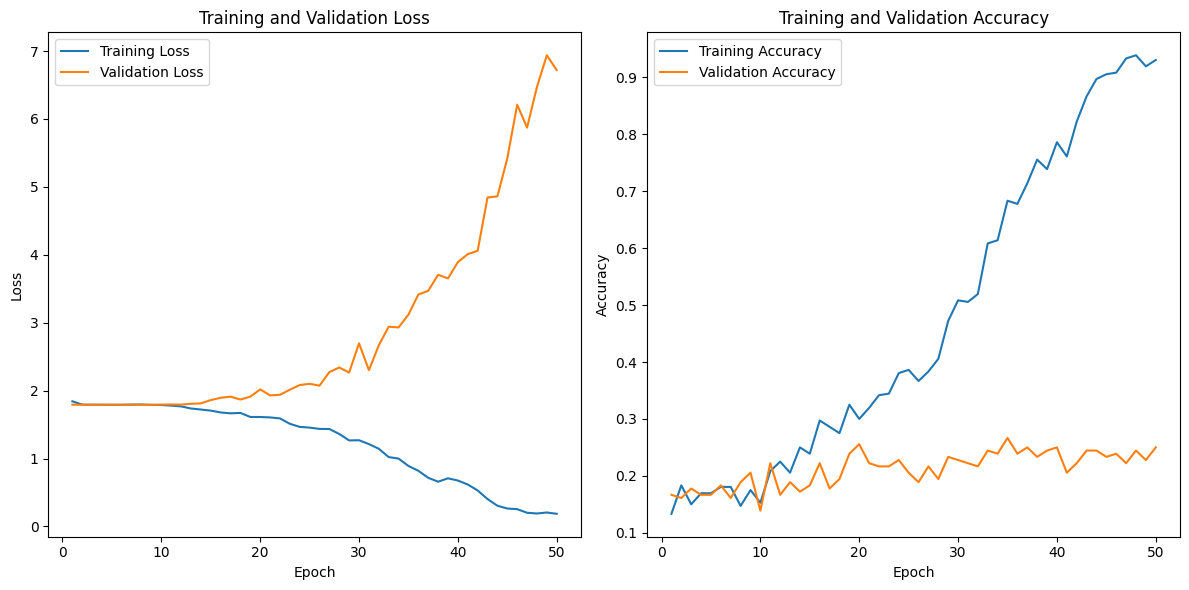

In [4]:
# # Evaluate model
# loss, accuracy = model.evaluate(validation_data, validation_labels)
# print("\nEvaluation Results:")
# print("Validation Loss:", loss)
# print("Validation Accuracy:", accuracy)
import matplotlib.pyplot as plt

# Plotting the training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), historyy['loss'], label='Training Loss')
plt.plot(range(1, epochs + 1), historyy['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), historyy['accuracy'], label='Training Accuracy')
plt.plot(range(1, epochs + 1), historyy['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

6/6 [==============================] - 5s 698ms/step


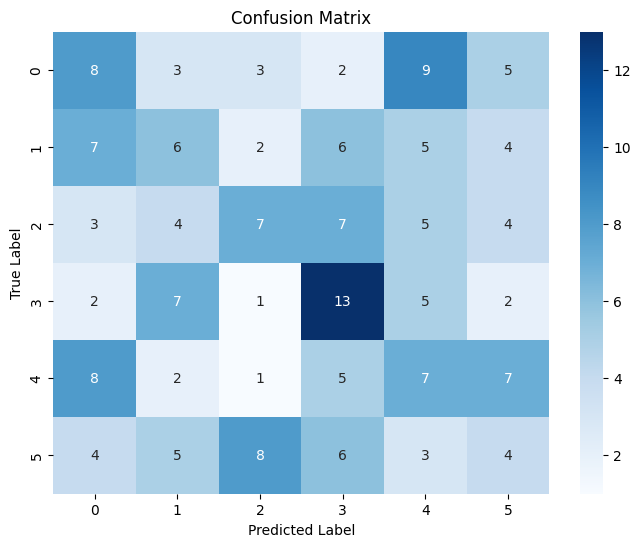

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on validation data
predictions = model.predict(validation_data)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(validation_labels, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


6/6 [==============================] - 4s 706ms/step


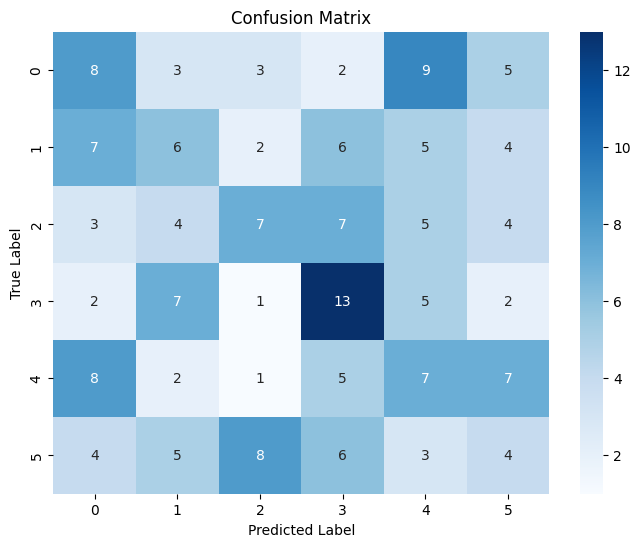

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on validation data
predictions = model.predict(validation_data)
#print(predictions)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(validation_labels, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, fmt="d",annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Calculate overall accuracy
overall_accuracy = accuracy_score(true_labels, predicted_labels)

# Calculate class-wise accuracy
class_wise_accuracy = {}
for i in range(len(conf_matrix)):
    class_wise_accuracy[i] = conf_matrix[i][i] / sum(conf_matrix[i])

# Print class-wise accuracy
print("Class-wise accuracy:")
for class_label, accuracy in class_wise_accuracy.items():
    print(f"Class {class_label}: {accuracy}")

# Print overall accuracy
print("\nOverall accuracy:", overall_accuracy)


Class-wise accuracy:
Class 0: 0.26666666666666666
Class 1: 0.2
Class 2: 0.23333333333333334
Class 3: 0.43333333333333335
Class 4: 0.23333333333333334
Class 5: 0.13333333333333333

Overall accuracy: 0.25


In [7]:

import matplotlib.pyplot as plt

# Train model
epochs = 50
history = {'loss': [], 'accuracy': [], 'val_loss': [], 'val_accuracy': []}  # Initialize history dictionary

for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}:")
    print("Training...")
    hist = model.fit(train_data, train_labels, validation_data=(validation_data, validation_labels), batch_size=32, verbose=1)
    
    # Append history values for this epoch
    history['loss'].append(hist.history['loss'][-1])
    history['accuracy'].append(hist.history['accuracy'][-1])
    history['val_loss'].append(hist.history['val_loss'][-1])
    history['val_accuracy'].append(hist.history['val_accuracy'][-1])
    
    print("Training Loss:", history['loss'][-1])
    print("Training Accuracy:", history['accuracy'][-1])
    print("Validation Loss:", history['val_loss'][-1])
    print("Validation Accuracy:", history['val_accuracy'][-1])
    print("")

# Evaluate model
loss, accuracy = model.evaluate(validation_data, validation_labels)
print("\nEvaluation Results:")
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

# Plotting the training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), history['loss'], label='Training Loss')
plt.plot(range(1, epochs + 1), history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), history['accuracy'], label='Training Accuracy')
plt.plot(range(1, epochs + 1), history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/50:
Training...
12/12 [==============================] - 65s 5s/step - loss: 0.5513 - accuracy: 0.8444 - val_loss: 4.1431 - val_accuracy: 0.1611
Training Loss: 0.5512834191322327
Training Accuracy: 0.8444444537162781
Validation Loss: 4.143099308013916
Validation Accuracy: 0.16111111640930176

Epoch 2/50:
Training...
 6/12 [==============>...............] - ETA: 31s - loss: 0.4584 - accuracy: 0.8229

KeyboardInterrupt: 